# TCC do Curso de Pós-graduação em Inteligência Artificial e Aprendizado de Máquina - PUC Minas

**Descrição:** modelo preditivo que indica a probabilidade de um cliente comprar ou não um novo produto

**Base de Dados:** disponível em https://www.kaggle.com/c/porto-seguro-data-challenge/data (29/01/2022)

**Plataforma de Desenvolvimento:** Google Colab (https://colab.research.google.com)

**Autor:** Cezar Ronaldo Eller

## Bibliotecas e Modelos Utilizados

* **numpy:** biblioteca Python utilizada na manipulação e realização de cálculos envolvendo vetores multidimensionais.

* **pandas:** biblioteca Python utilizada na análise e manipulação de dados.

* **drive:** biblioteca que permite o acesso ao Google Drive utilizando código Python.

* **matplotlib.pyplot:** módulo utilizado na criação de gráficos.

* **seaborn:** biblioteca de visualização de dados do Python.

* **train_test_split:** pacote do sklearn que permite a divisão dos dados em conjuntos de treinamento e teste.

* **RandomForestClassifier:** classe do sklearn que implementa o algoritmo Random Forest.

* **accuracy_score, recall_score, precision_score:** funções do sklearn que calculam a acurácia, recall e precisão de um modelo.

* **confusion_matrix, ConfusionMatrixDisplay:** função e classe do sklearn que calculam e plotam a matriz de confusão.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Configurações Gerais

* Exibição de números decimais com no máximo 4 casas.
* Exibição de um máximo de 600 linhas do DataFrame no console, sem que algum dado seja truncado.
* Exibição de um máximo de 600 colunas do DataFrame no console, sem que algum dado seja truncado.

In [2]:
np.set_printoptions(precision=4)
pd.set_option('precision', 4)
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)

## Leitura e Carga da Base de Dados e Descrição de Seus Atributos

Lê e carrega em um DataFrame a base de dados a ser utilizada no treinamento do modelo, sendo esta formada por 70 colunas, com cada linha representando 1 cliente, conforme abaixo:

* 1 variável de identificação (id).
* 68 variáveis explicativas (colunas que começam com o prefixo 'var').
* 1 variável resposta (y).

Os tipos das variáveis foram definidos conforme abaixo:

* id: qualitativo nominal.
* var1: qualitativo nominal.
* var2: qualitativo nominal.
* var3: qualitativo nominal.
* var4: qualitativo nominal.
* var5: qualitativo nominal.
* var6: qualitativo nominal.
* var7: qualitativo nominal.
* var8: qualitativo nominal.
* var9: qualitativo nominal.
* var10: qualitativo nominal.
* var11: qualitativo nominal.
* var12: qualitativo nominal.
* var13: qualitativo nominal.
* var14: qualitativo nominal.
* var15: qualitativo nominal.
* var16: qualitativo nominal.
* var17: qualitativo nominal.
* var18: qualitativo nominal.
* var19: qualitativo nominal.
* var20: qualitativo nominal.
* var21: qualitativo nominal.
* var22: qualitativo nominal.
* var23: qualitativo nominal.
* var24: quantitativo discreto.
* var25: quantitativo discreto.
* var26: qualitativo ordinal.
* var27: quantitativo discreto.
* var28: qualitativo nominal.
* var29: qualitativo nominal.
* var30: qualitativo nominal.
* var31: qualitativo nominal.
* var32: qualitativo ordinal.
* var33: qualitativo nominal.
* var34: qualitativo nominal.
* var35: qualitativo nominal.
* var36: qualitativo nominal.
* var37: qualitativo nominal.
* var38: qualitativo nominal.
* var39: qualitativo nominal.
* var40: quantitativo discreto.
* var41: qualitativo nominal.
* var42: qualitativo ordinal.
* var43: qualitativo ordinal.
* var44: quantitativo discreto.
* var45: quantitativo discreto.
* var46: quantitativo discreto.
* var47: quantitativo discreto.
* var48: quantitativo discreto.
* var49: quantitativo discreto.
* var50: quantitativo discreto.
* var51: quantitativo discreto.
* var52: quantitativo discreto.
* var53: quantitativo discreto.
* var54: quantitativo discreto.
* var55: quantitativo continua.
* var56: quantitativo continua.
* var57: quantitativo continua.
* var58: quantitativo continua.
* var59: quantitativo continua.
* var60: quantitativo continua.
* var61: quantitativo continua.
* var62: quantitativo continua.
* var63: quantitativo continua.
* var64: quantitativo continua.
* var65: quantitativo continua.
* var66: quantitativo continua.
* var67: quantitativo discreto.
* var68: quantitativo discreto.
* y: quantitativo discreto.

In [3]:
drive.mount('/content/drive/')
ps_train = pd.read_csv('/content/drive/My Drive/TCC/train.csv', sep=',')
ps_train.head(5)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.2124,0.137,0.8333,0.0378,0.0581,0.3114,0.1423,0.0561,0.6327,0.0241,0.2534,0.006,0.1324,0.1397,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.2288,0.308,0.3054,0.0693,0.2489,-999.0000,-999.0000,0.0710,0.7740,0.0193,-999.0000,-999.000,0.1471,0.1066,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.2046,0.213,0.4516,0.0186,0.2145,-999.0000,0.2008,0.0510,0.9808,0.0185,-999.0000,-999.000,0.3824,0.2426,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.2083,0.716,0.1011,0.2048,0.3494,-999.0000,0.3524,0.0443,0.9516,0.0237,0.3634,0.002,0.1471,0.1324,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.2229,0.596,0.1011,0.1404,0.1896,0.0212,0.2262,0.0591,0.9062,0.0207,-999.0000,-999.000,0.4559,0.1324,1


## Análise Exploratória dos Dados

Exibição da quantidade de registros e atributos da base de dados (dimensões) e do total de clientes que não compraram (y=0) e que compraram (y=1) um produto.

In [4]:
print("Dimensões do Dataset:\n{0}\n".format(ps_train.shape))
ps_train['y'].value_counts()

Dimensões do Dataset:
(14123, 70)



0    11273
1     2850
Name: y, dtype: int64

Exibição da estatística descritiva da base de dados.

In [5]:
print(ps_train.describe())

               id        var1        var2        var3        var4        var5  \
count  14123.0000  14123.0000  14123.0000  14123.0000  14123.0000  14123.0000   
mean   17474.6494      9.7127     23.9666   1584.6712  15179.1760   5543.6979   
std    10249.0666      7.2696    218.4297   1118.1018   9994.2952   3329.4937   
min        1.0000      0.0000   -999.0000   -999.0000   -999.0000      0.0000   
25%     8550.5000      4.0000     38.0000    731.0000   6493.5000   2374.0000   
50%    17464.0000      5.0000     53.0000   1461.0000  15309.0000   6159.0000   
75%    26358.5000     18.0000    110.0000   2481.0000  23818.0000   8594.0000   
max    35306.0000     30.0000    129.0000   3546.0000  32403.0000  11373.0000   

             var6        var7        var8        var9       var10       var11  \
count  14123.0000  14123.0000  14123.0000  14123.0000  14123.0000  14123.0000   
mean    1315.3142   -109.7137   -138.4267   -106.3624   -118.9867  13342.2999   
std     1210.0749    350.20

var65: 86% dos registros da base de dados possuem valores indefinidos.

Percentil 86o.:  -999.0
Percentil 87o.:  0.02761919456873


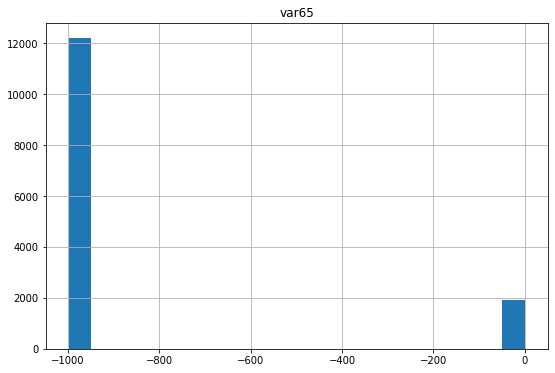

In [6]:
ps_train.hist(column='var65', figsize=(9,6), bins=20)
print("Percentil 86o.: ", np.percentile(ps_train.var65, 86))
print("Percentil 87o.: ", np.percentile(ps_train.var65, 87))

var66: 86% dos registros da base de dados possuem valores indefinidos.

Percentil 86o.:  -999.0
Percentil 87o.:  0.0


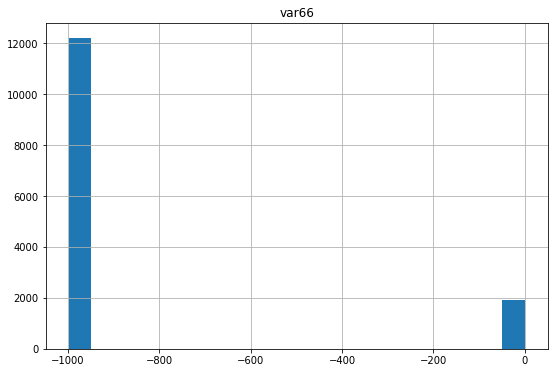

In [7]:
ps_train.hist(column='var66', figsize=(9,6), bins=20)
print("Percentil 86o.: ", np.percentile(ps_train.var66, 86))
print("Percentil 87o.: ", np.percentile(ps_train.var66, 87))

var60: 45% dos registros da base de dados possuem valores indefinidos.

Percentil 45o.:  -999.0
Percentil 46o.:  0.0


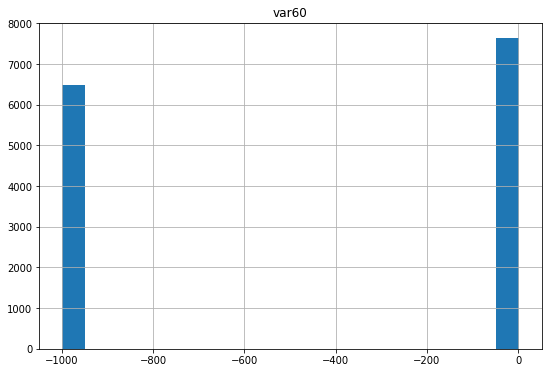

In [8]:
ps_train.hist(column='var60', figsize=(9,6), bins=20)
print("Percentil 45o.: ", np.percentile(ps_train.var60, 45))
print("Percentil 46o.: ", np.percentile(ps_train.var60, 46))

Análise da distribuição dos dados para todos os atributos cujo valor “-999.0000” aparece em até 25% dos registros presentes na base de dados (o histograma não exibe os registros que apresentam valor discrepante).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64b9a790>]],
      dtype=object)

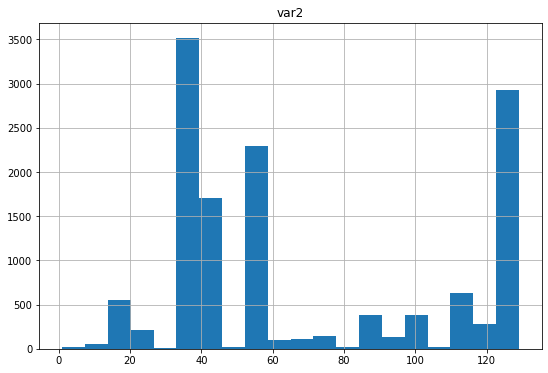

In [9]:
filtro  = ps_train['var2'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var2', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64a6f450>]],
      dtype=object)

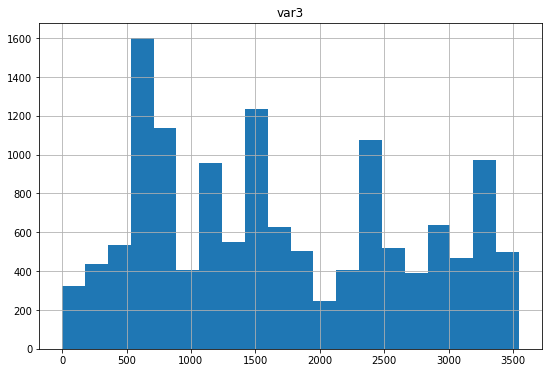

In [10]:
filtro  = ps_train['var3'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var3', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd649cced0>]],
      dtype=object)

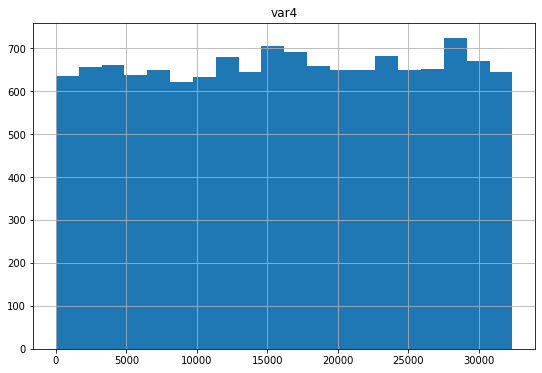

In [11]:
filtro  = ps_train['var4'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var4', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64906a50>]],
      dtype=object)

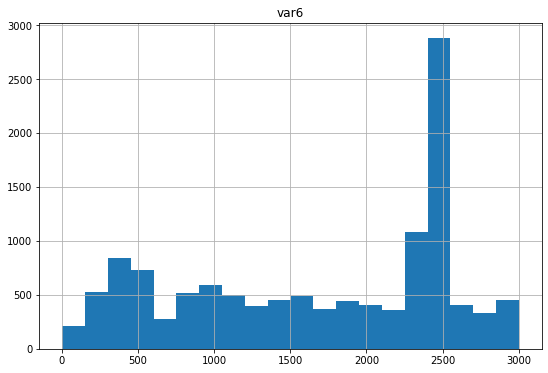

In [12]:
filtro  = ps_train['var6'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var6', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6490aad0>]],
      dtype=object)

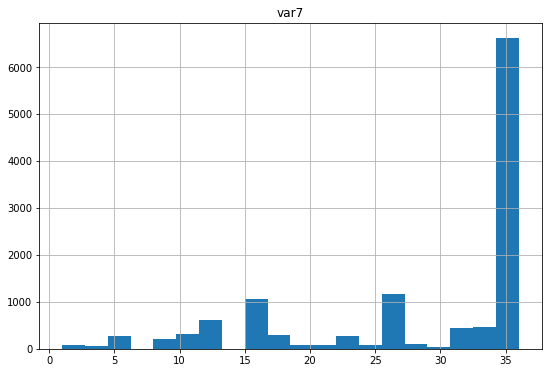

In [13]:
filtro  = ps_train['var7'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var7', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd648567d0>]],
      dtype=object)

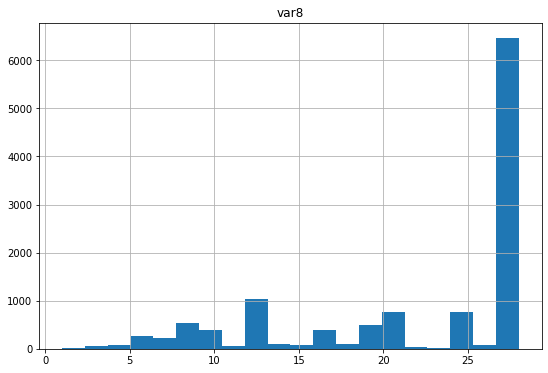

In [14]:
filtro  = ps_train['var8'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var8', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64711a50>]],
      dtype=object)

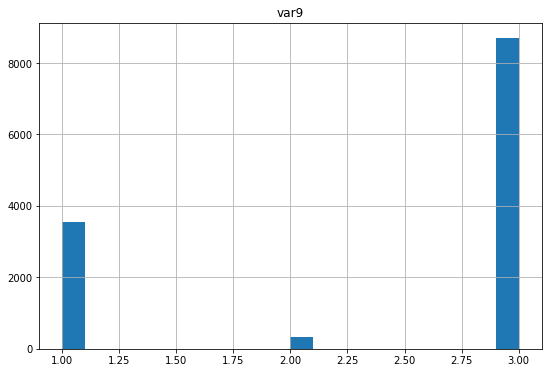

In [15]:
filtro  = ps_train['var9'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var9', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd649a7990>]],
      dtype=object)

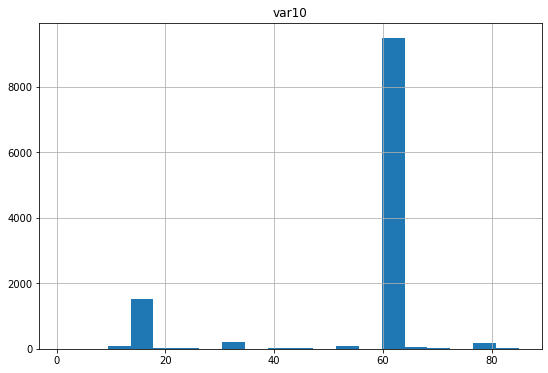

In [16]:
filtro  = ps_train['var10'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var10', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd65114850>]],
      dtype=object)

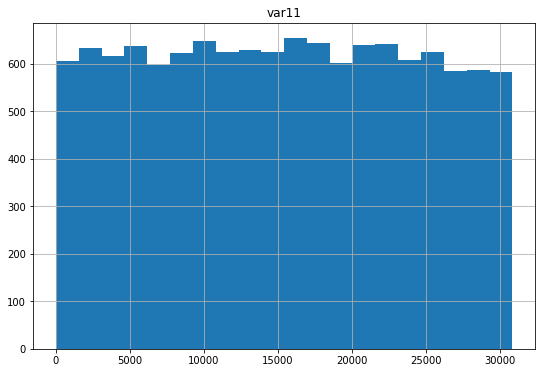

In [17]:
filtro  = ps_train['var11'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var11', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd65123790>]],
      dtype=object)

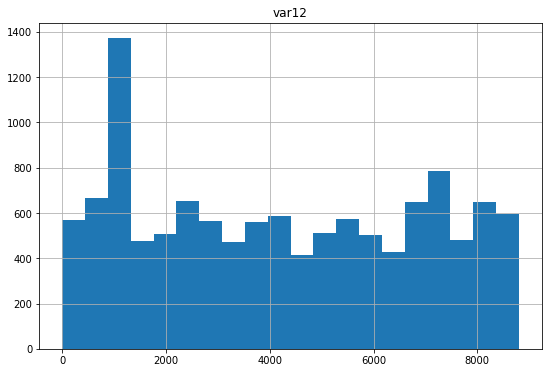

In [18]:
filtro  = ps_train['var12'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var12', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64697b10>]],
      dtype=object)

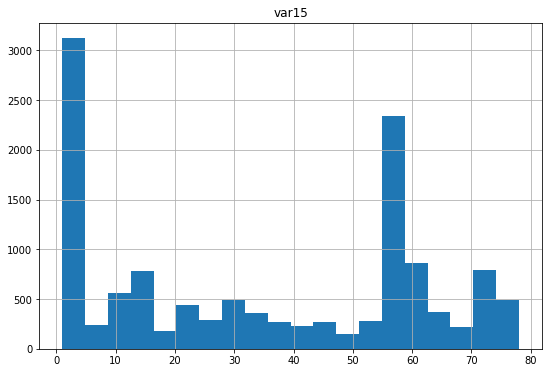

In [19]:
filtro  = ps_train['var15'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var15', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd645ca5d0>]],
      dtype=object)

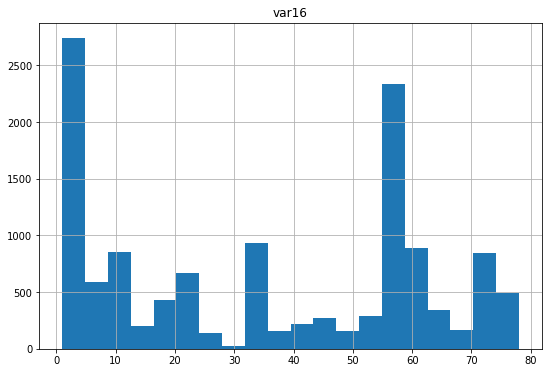

In [20]:
filtro  = ps_train['var16'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var16', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64505c50>]],
      dtype=object)

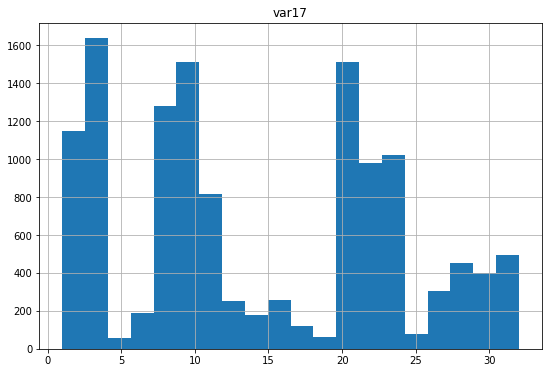

In [21]:
filtro  = ps_train['var17'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var17', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64434510>]],
      dtype=object)

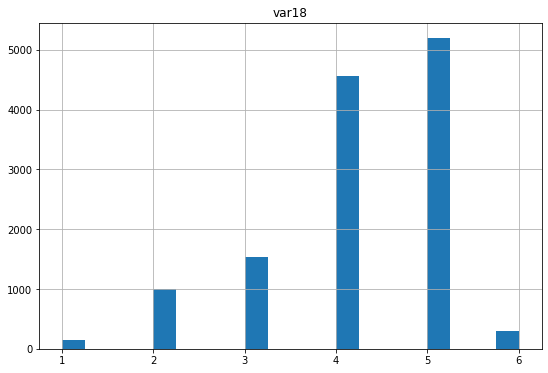

In [22]:
filtro  = ps_train['var18'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var18', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd643cfc90>]],
      dtype=object)

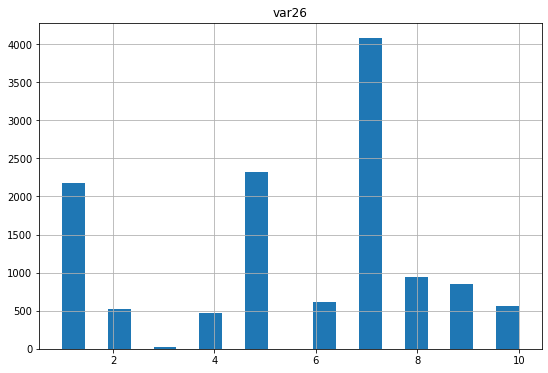

In [23]:
filtro  = ps_train['var26'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var26', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6430ae10>]],
      dtype=object)

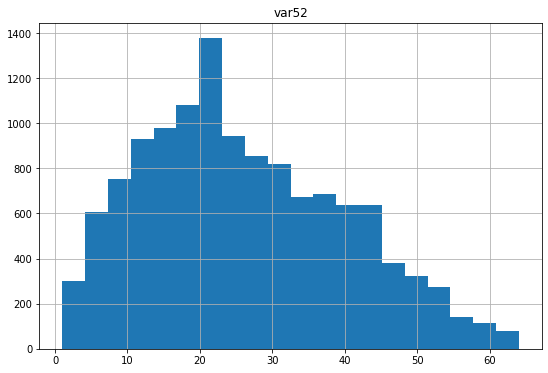

In [24]:
filtro  = ps_train['var52'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var52', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64221350>]],
      dtype=object)

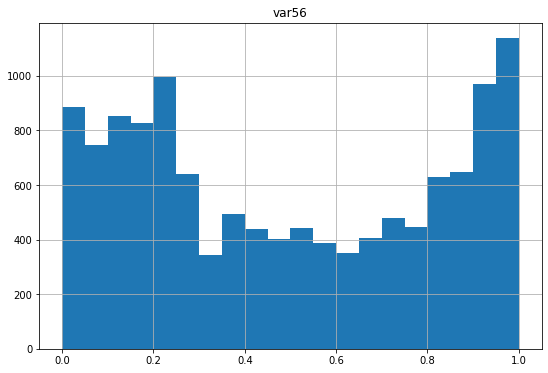

In [25]:
filtro  = ps_train['var56'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var56', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd641e5890>]],
      dtype=object)

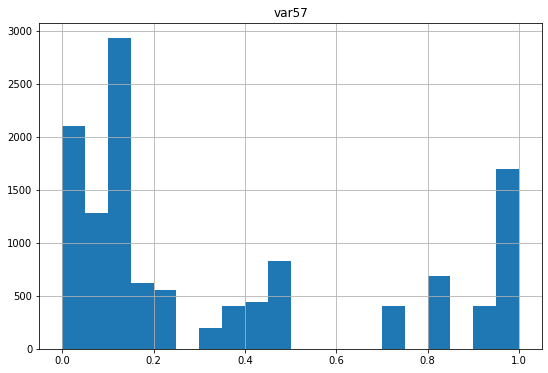

In [26]:
filtro  = ps_train['var57'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var57', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd65d10090>]],
      dtype=object)

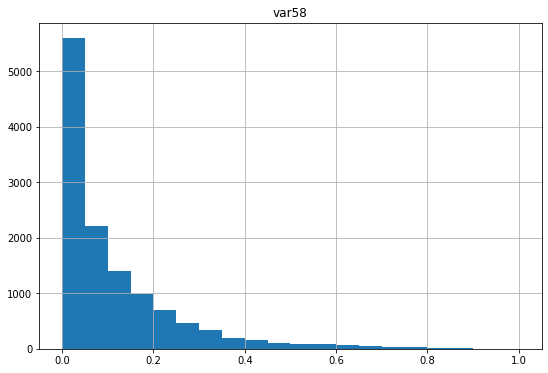

In [27]:
filtro  = ps_train['var58'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var58', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6408d3d0>]],
      dtype=object)

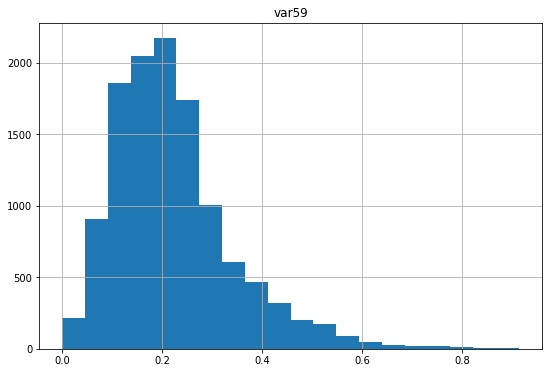

In [28]:
filtro  = ps_train['var59'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var59', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd63facbd0>]],
      dtype=object)

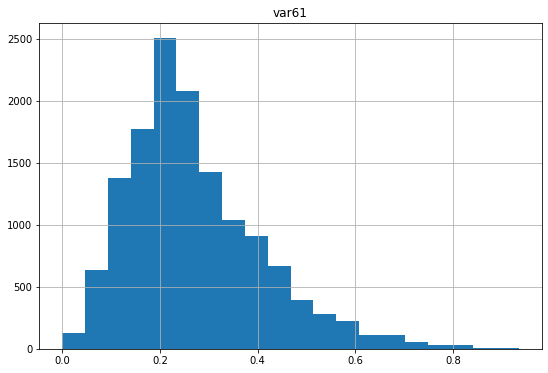

In [29]:
filtro  = ps_train['var61'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var61', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd63f57f50>]],
      dtype=object)

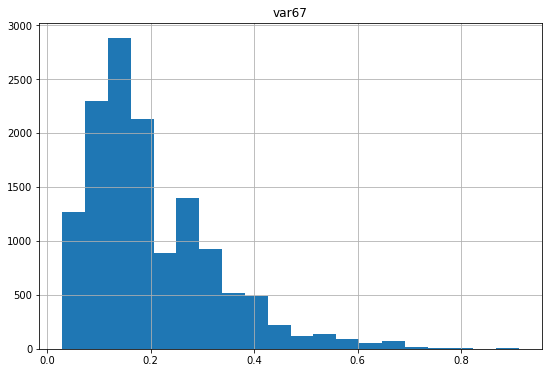

In [30]:
filtro  = ps_train['var67'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var67', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd63ebe610>]],
      dtype=object)

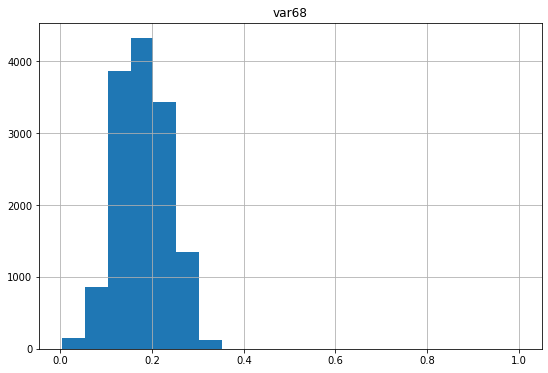

In [31]:
filtro  = ps_train['var68'] != -999
filtrado = ps_train[filtro]
filtrado.hist(column='var68', figsize=(9,6), bins=20)

Cálculo do coeficiente de correção para cada par de atributos numéricos da nossa base de dados.

In [32]:
ps_train.corr()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
id,1.0000,-1.8434e-02,-3.2169e-02,-0.0041,0.0069,-0.0006,-0.0054,-0.0239,0.0039,-0.0052,-0.0031,0.0051,-0.0076,0.0137,-0.0043,-0.0030,-0.0030,-0.0035,-0.0037,0.0016,-0.0051,0.0217,-0.0027,0.0039,-0.0071,0.0087,0.0100,-5.8398e-03,-0.0187,0.0081,-1.2403e-02,-0.0031,0.0114,9.2665e-03,-0.0060,-0.0018,-0.0055,0.0098,-0.0059,-0.0038,-0.0075,0.0010,6.2942e-03,-0.0128,-0.0113,-0.0031,-0.0022,-0.0056,-0.0115,0.0052,-0.0020,-0.0075,-0.0056,-0.0094,-1.5539e-02,-0.0022,-0.0056,-0.0058,0.0099,-0.0128,0.0025,-0.0070,-0.0039,0.0039,0.0060,-0.0039,-0.0039,-0.0297,6.6034e-03,-0.0021
var1,-0.0184,1.0000e+00,7.3375e-05,-0.0342,-0.0512,0.0027,-0.0353,-0.0390,0.1113,-0.0278,-0.0297,-0.0142,-0.0259,-0.0107,-0.0369,-0.0385,-0.0386,-0.0385,-0.0383,-0.0127,-0.0394,-0.0099,-0.0045,-0.0247,-0.0111,0.0063,-0.0329,-1.4635e-02,-0.0328,-0.0140,5.9829e-03,0.0077,-0.0102,8.5160e-03,-0.0472,0.0125,0.0033,-0.0112,0.0669,-0.0449,-0.0531,-0.0016,2.0797e-02,-0.0039,-0.0114,0.0079,0.0059,0.0072,0.0015,-0.0022,0.1030,0.0564,-0.0269,-0.0207,-6.8620e-03,0.0026,-0.0244,-0.0245,-0.0328,-0.0274,-0.0173,-0.0117,-0.0199,-0.0269,-0.0061,0.0063,0.0063,-0.0001,-9.0929e-04,-0.1447
var2,-0.0322,7.3375e-05,1.0000e+00,0.5009,0.0502,-0.0181,0.1135,0.1546,0.4802,0.1749,0.1317,0.0779,0.0681,-0.0087,0.0503,0.1855,0.1855,0.1860,0.1862,-0.0064,0.0480,-0.0062,-0.0525,0.0567,0.0041,-0.0109,0.1718,4.9892e-02,-0.0038,-0.0203,-1.6663e-02,-0.0015,-0.0027,1.3095e-02,-0.0064,-0.0155,-0.0038,-0.0074,-0.0026,-0.0051,-0.0030,0.0232,-1.6177e-02,0.0097,0.0013,0.0331,0.0333,0.0098,0.0204,0.0471,0.0780,0.0725,0.1759,0.1388,1.4888e-01,0.0089,0.1738,0.1737,0.1718,0.1438,0.0726,0.0228,0.0037,0.0016,0.0097,0.0321,0.0321,0.9643,-1.2279e-02,-0.0326
var3,-0.0041,-3.4189e-02,5.0088e-01,1.0000,0.0114,-0.0170,0.0496,0.0768,0.2354,0.0707,0.0507,0.0189,0.0311,-0.0244,-0.0047,0.0681,0.0681,0.0686,0.0689,-0.0161,-0.0061,-0.0143,-0.0380,0.0054,-0.0037,-0.0078,0.0629,4.1714e-02,-0.0128,-0.0238,-8.2154e-03,-0.0115,0.0039,1.4406e-02,0.0008,-0.0173,0.0052,-0.0024,-0.0092,-0.0027,0.0072,0.0131,-1.3769e-02,0.0153,0.0062,0.0392,0.0399,0.0147,0.0295,0.0327,-0.1470,-0.0591,0.0734,0.0595,6.6451e-02,0.0129,0.0707,0.0705,0.0629,0.0605,0.0327,0.0097,0.0003,-0.0007,-0.0014,0.0430,0.0430,0.4777,-8.5589e-03,-0.0020
var4,0.0069,-5.1234e-02,5.0235e-02,0.0114,1.0000,-0.0288,0.2574,0.3267,-0.0788,0.3038,0.3021,0.4803,0.1716,0.0070,0.1644,0.3199,0.3199,0.3192,0.3184,0.0059,0.1747,0.0131,-0.0527,0.2403,0.0014,0.0185,0.3002,6.7358e-02,0.0163,0.0822,5.5467e-03,-0.0113,0.0119,4.4897e-04,0.0256,0.0165,0.0004,0.0082,-0.0160,0.0341,0.0078,0.0146,2.7355e-02,-0.0099,0.0072,0.0107,0.0069,0.0172,0.0064,0.0515,-0.0100,0.0187,0.3023,0.2364,2.2155e-01,-0.0204,0.2941,0.2947,0.3002,0.2673,0.1416,0.0110,-0.0017,0.0213,-0.0052,0.0213,0.0213,0.0545,1.6430e-02,0.2677
var5,-0.0006,2.6618e-03,-1.8062e-02,-0.0170,-0.0288,1.0000,-0.0967,-0.1535,-0.0006,-0.0395,-0.0326,-0.0146,0.3628,0.0433,0.0903,-0.0485,-0.0485,-0.0485,-0.0489,0.0331,0.0897,0.0434,0.0377,-0.0065,-0.0219,0.0013,-0.0446,1.7516e-02,0.0958,0.0187,-3.7257e-03,-0.0035,-0.0127,1.3154e-02,0.0516,-0.0014,0.0286,-0.0006,-0.0054,-0.0133,0.0160,0.0051,-7.9182e-03,0.0207,-0.0021,0.0069,0.0005,0.0222,0.0190,0.0099,-0.0090,-0.0184,-0.0393,-0.0516,-5.4656e-02,0.0069,-0.0397,-0.0390,-0.0446,-0.0212,-0.0076,0.0074,-0.0009,0.0152,0.0178,0.0156,0.0156,-0.0194,1.4407e-02,-0.0434
var6,-0.0054,-3.5333e-02,1.1346e-01,0.0496,0.2574,-0.0967,1.0000,0.7420,0.0342,0.3404,0.3367,0.1892,0.2114,0.4969,0.2683,0.3610,0.3610,0.3597,0.3588,0.3103,0.2901,0.6091,-0.1518,0.3030,-0.0155,0.0148,0.3380,2.0685e-01,0.1363,0.1151,1.3042e-

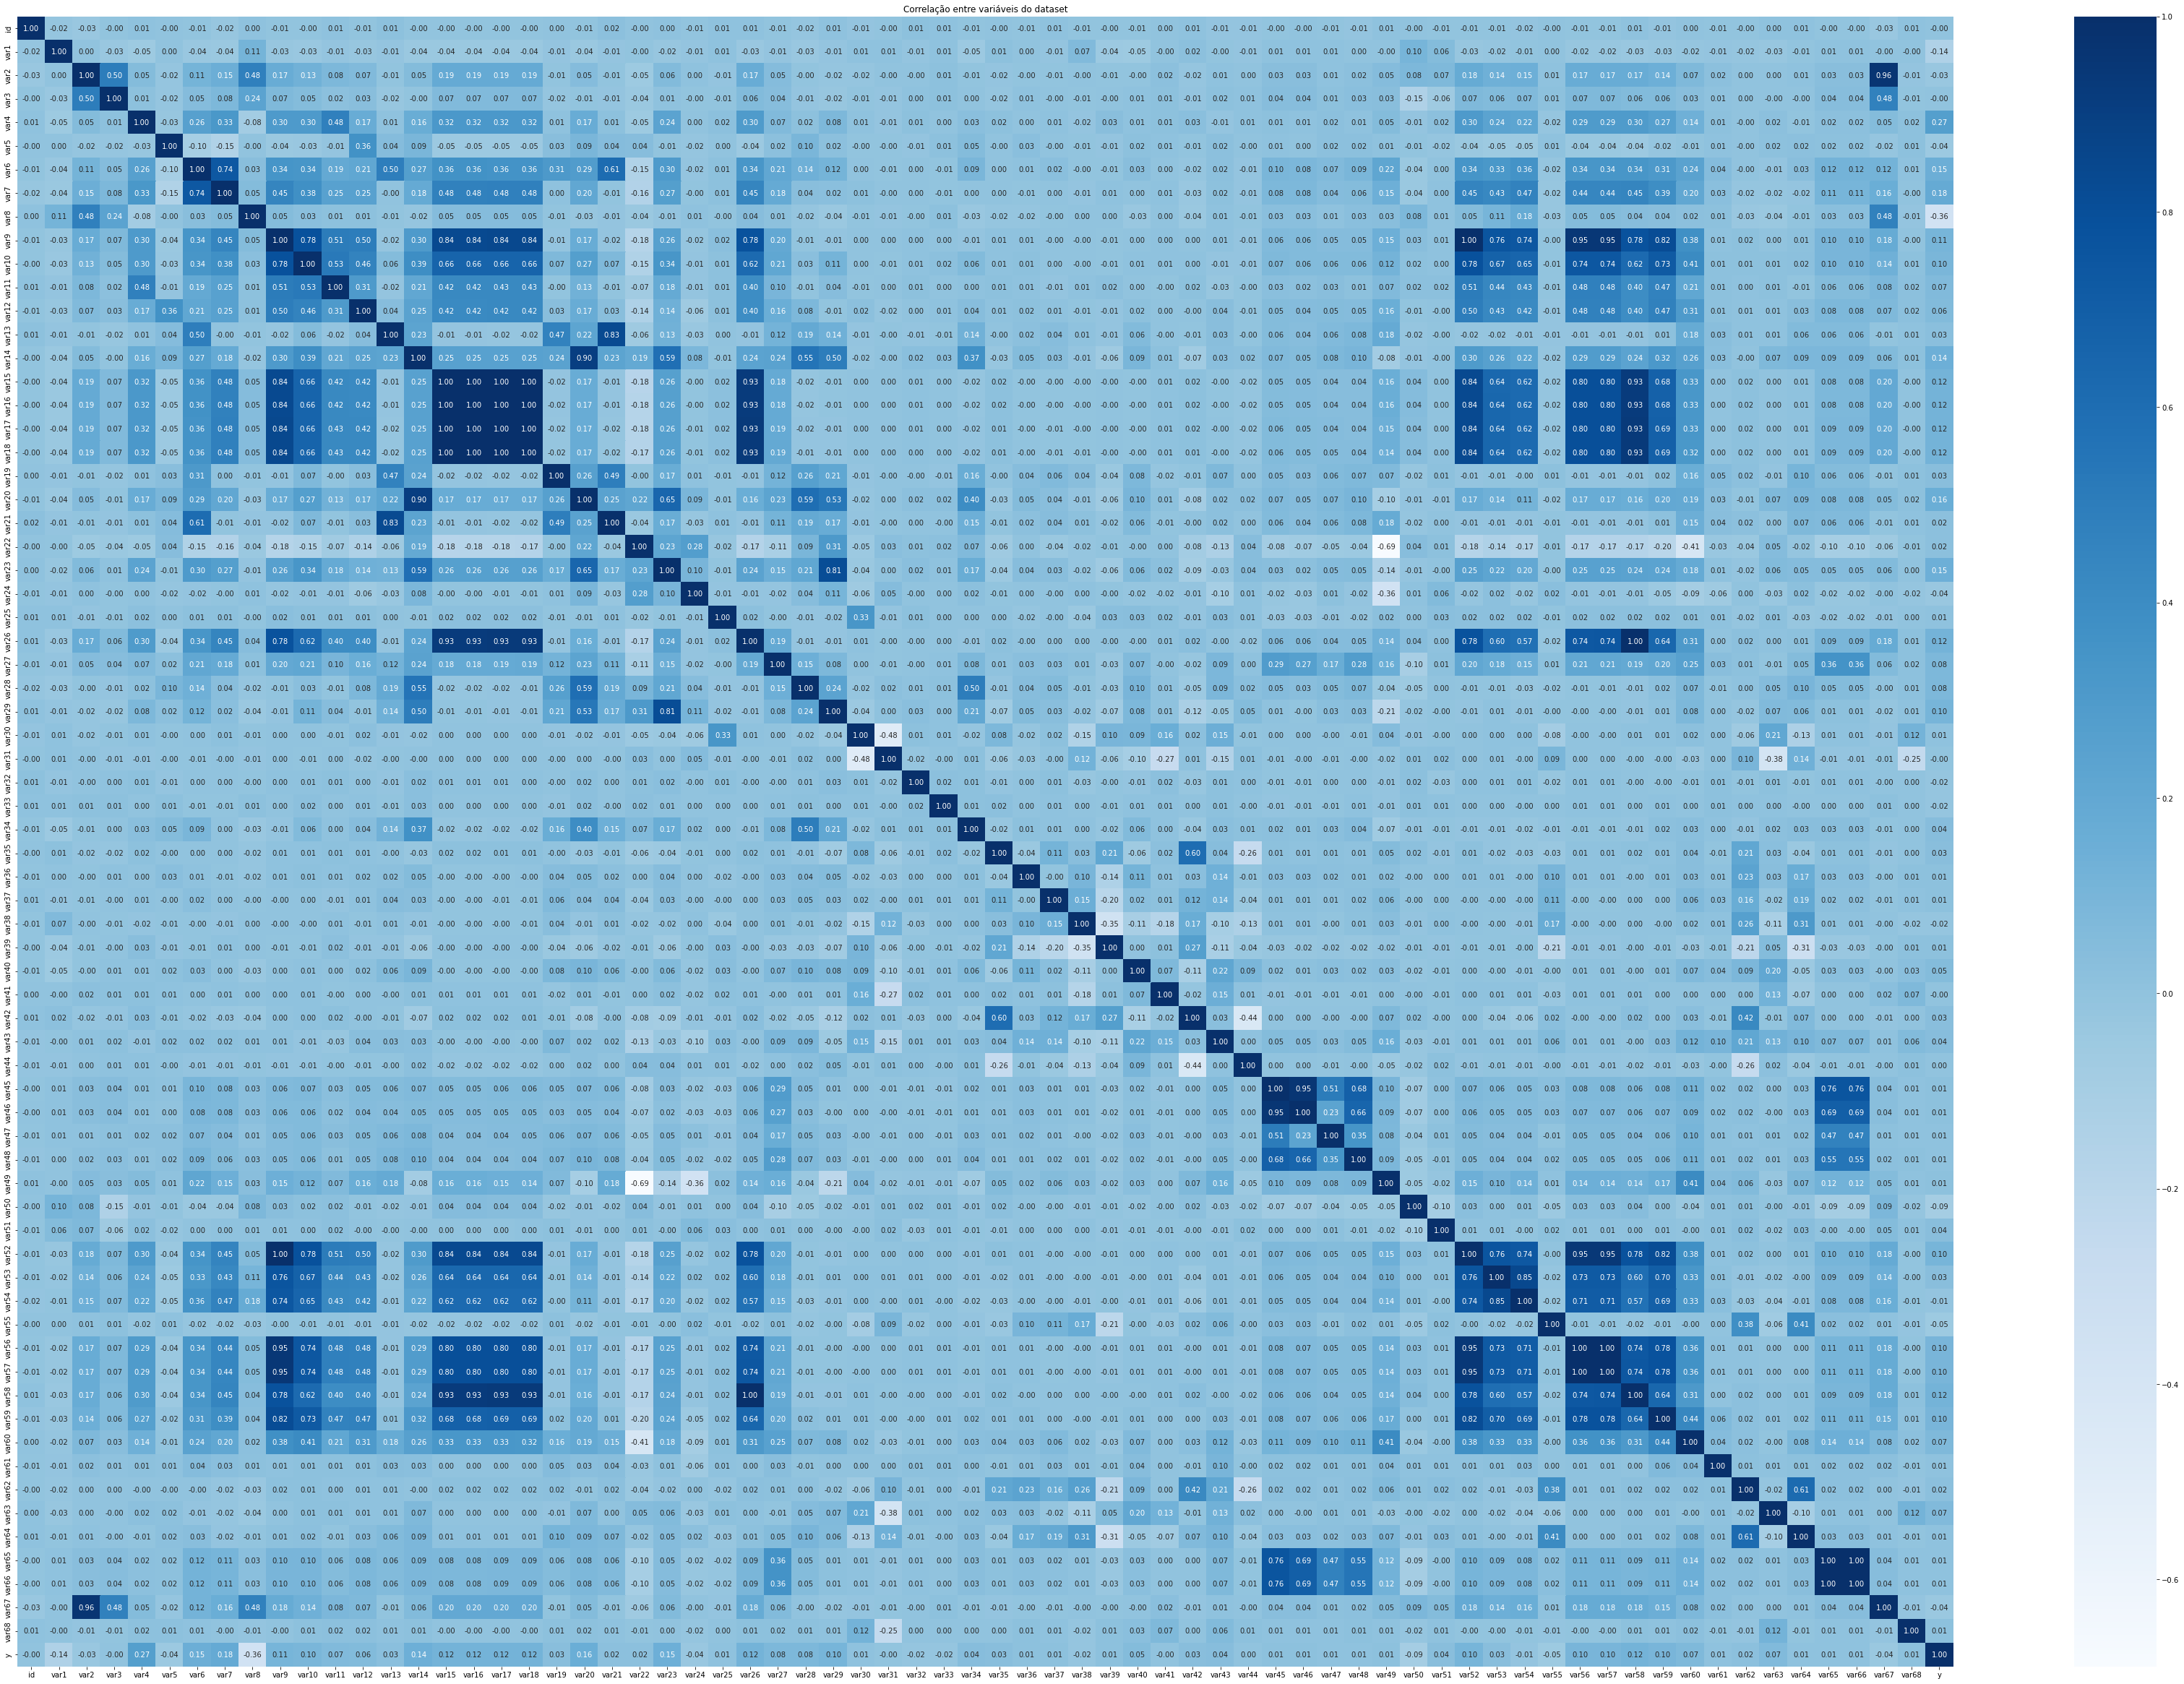

In [33]:
plt.figure(figsize=(60, 42))
sns.heatmap(ps_train.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

## Pré-processamento - Testes das hipóteses

Lista de hipóteses testadas e confirmadas:

* Exclusão do atributo "id".
* Exclusão do atributo "var65".
* Exclusão do atributo "var66".
* Exclusão do atributo "var60".
* Substituição dos valores do atributo "var9" que são iguais a "-999.0000" pelo valor mais frequente.

Lista de hipóteses testadas e não confirmadas:

* Substituição dos valores do atributo "var6" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var7" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var8" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var10" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var12" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var52" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var52" que são iguais a "-999.0000" pela mediana.
* Substituição dos valores do atributo "var58" que são iguais a "-999.0000" pelo valor mais frequente.
* Substituição dos valores do atributo "var59" que são iguais a "-999.0000" pela mediana.
* Substituição dos valores do atributo "var59" que são iguais a "-999.0000" pela média.
* Substituição dos valores do atributo "var61" que são iguais a "-999.0000" pela mediana.
* Substituição dos valores do atributo "var61" que são iguais a "-999.0000" pela média.
* Substituição dos valores do atributo "var67" que são iguais a "-999.0000" pela mediana.
* Substituição dos valores do atributo "var67" que são iguais a "-999.0000" pela média.
* Substituição dos valores do atributo "var68" que são iguais a "-999.0000" pela mediana.
* Substituição dos valores do atributo "var68" que são iguais a "-999.0000" pela média.
* Exclusão do atributo "var2".
* Exclusão do atributo "var9".
* Exclusão do atributo "var10".
* Exclusão do atributo "var13".
* Exclusão do atributo "var14".
* Exclusão do atributo "var15".
* Exclusão do atributo "var16".
* Exclusão do atributo "var17".
* Exclusão do atributo "var18".
* Exclusão do atributo "var20".
* Exclusão do atributo "var21".
* Exclusão do atributo "var23".
* Exclusão do atributo "var26".
* Exclusão do atributo "var29".
* Exclusão do atributo "var45".
* Exclusão do atributo "var46".
* Exclusão do atributo "var52".
* Exclusão do atributo "var53".
* Exclusão do atributo "var54".
* Exclusão do atributo "var56".
* Exclusão do atributo "var57".
* Exclusão do atributo "var58".
* Exclusão do atributo "var59".
* Exclusão do atributo "var67".

In [34]:
# Hipóteses confirmadas
del ps_train["id"]
del ps_train["var65"]
del ps_train["var66"]
del ps_train["var60"]

filtro  = ps_train['var9'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var9.value_counts().index[0]
novo_var9 = np.where(np.equal(ps_train["var9"], -999), valor_mais_frequente, ps_train["var9"])
ps_train["var9"] = novo_var9

# Hipóteses não confirmadas
'''filtro  = ps_train['var6'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var6.value_counts().index[0]
novo_var6 = np.where(np.equal(ps_train["var6"], -999), valor_mais_frequente, ps_train["var6"])
ps_train["var6"] = novo_var6'''

'''filtro  = ps_train['var7'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var7.value_counts().index[0]
novo_var7 = np.where(np.equal(ps_train["var7"], -999), valor_mais_frequente, ps_train["var7"])
ps_train["var7"] = novo_var7'''

'''filtro  = ps_train['var8'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var8.value_counts().index[0]
novo_var8 = np.where(np.equal(ps_train["var8"], -999), valor_mais_frequente, ps_train["var8"])
ps_train["var8"] = novo_var8'''

'''filtro  = ps_train['var10'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var10.value_counts().index[0]
novo_var10 = np.where(np.equal(ps_train["var10"], -999), valor_mais_frequente, ps_train["var10"])
ps_train["var10"] = novo_var10'''

'''filtro  = ps_train['var12'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var12.value_counts().index[0]
novo_var12 = np.where(np.equal(ps_train["var12"], -999), valor_mais_frequente, ps_train["var12"])
ps_train["var12"] = novo_var12'''

'''filtro  = ps_train['var52'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var52.value_counts().index[0]
novo_var52 = np.where(np.equal(ps_train["var52"], -999), valor_mais_frequente, ps_train["var52"])
ps_train["var52"] = novo_var52'''

'''valor_mediana = np.median([elemento for elemento in ps_train["var52"] if np.not_equal(elemento, -999)])
novo_var52 = np.where(np.equal(ps_train["var52"], -999), valor_mediana, ps_train["var52"])
ps_train["var52"] = novo_var52'''

'''filtro  = ps_train['var58'] != -999
filtrado = ps_train[filtro]
valor_mais_frequente = filtrado.var58.value_counts().index[0]
novo_var58 = np.where(np.equal(ps_train["var58"], -999), valor_mais_frequente, ps_train["var58"])
ps_train["var58"] = novo_var58'''

'''valor_mediana = np.median([elemento for elemento in ps_train["var59"] if np.not_equal(elemento, -999)])
novo_var59 = np.where(np.equal(ps_train["var59"], -999), valor_mediana, ps_train["var59"])
ps_train["var59"] = novo_var59'''

'''valor_media = np.mean([elemento for elemento in ps_train["var59"] if np.not_equal(elemento, -999)])
novo_var59 = np.where(np.equal(ps_train["var59"], -999), valor_media, ps_train["var59"])
ps_train["var59"] = novo_var59'''

'''valor_mediana = np.median([elemento for elemento in ps_train["var61"] if np.not_equal(elemento, -999)])
novo_var61 = np.where(np.equal(ps_train["var61"], -999), valor_mediana, ps_train["var61"])
ps_train["var61"] = novo_var61'''

'''valor_media = np.mean([elemento for elemento in ps_train["var61"] if np.not_equal(elemento, -999)])
novo_var61 = np.where(np.equal(ps_train["var61"], -999), valor_media, ps_train["var61"])
ps_train["var61"] = novo_var61'''

'''valor_mediana = np.median([elemento for elemento in ps_train["var67"] if np.not_equal(elemento, -999)])
novo_var67 = np.where(np.equal(ps_train["var67"], -999), valor_mediana, ps_train["var67"])
ps_train["var67"] = novo_var67'''

'''valor_media = np.mean([elemento for elemento in ps_train["var67"] if np.not_equal(elemento, -999)])
novo_var67 = np.where(np.equal(ps_train["var67"], -999), valor_media, ps_train["var67"])
ps_train["var67"] = novo_var67'''

'''valor_mediana = np.median([elemento for elemento in ps_train["var68"] if np.not_equal(elemento, -999)])
novo_var68 = np.where(np.equal(ps_train["var68"], -999), valor_mediana, ps_train["var68"])
ps_train["var68"] = novo_var68'''

'''valor_media = np.mean([elemento for elemento in ps_train["var68"] if np.not_equal(elemento, -999)])
novo_var68 = np.where(np.equal(ps_train["var68"], -999), valor_media, ps_train["var68"])
ps_train["var68"] = novo_var68'''

#del ps_train["var2"]
#del ps_train["var9"]
#del ps_train["var10"]
#del ps_train["var13"]
#del ps_train["var14"]
#del ps_train["var15"]
#del ps_train["var16"]
#del ps_train["var17"]
#del ps_train["var18"]
#del ps_train["var20"]
#del ps_train["var21"]
#del ps_train["var23"]
#del ps_train["var26"]
#del ps_train["var29"]
#del ps_train["var45"]
#del ps_train["var46"]
#del ps_train["var52"]
#del ps_train["var53"]
#del ps_train["var54"]
#del ps_train["var56"]
#del ps_train["var57"]
#del ps_train["var58"]
#del ps_train["var59"]
#del ps_train["var67"]

'valor_media = np.mean([elemento for elemento in ps_train["var68"] if np.not_equal(elemento, -999)])\nnovo_var68 = np.where(np.equal(ps_train["var68"], -999), valor_media, ps_train["var68"])\nps_train["var68"] = novo_var68'

## Separação dos atributos de entrada e do atributo alvo.

In [35]:
X = ps_train.iloc[:,0:(ps_train.shape[1] - 1)]
y = ps_train.iloc[:,(ps_train.shape[1] - 1)]
print("\nAtributos do Dataset:\n{0}".format(list(X.keys())))
print(y)


Atributos do Dataset:
['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var67', 'var68']
0        1
1        0
2        0
3        0
4        1
        ..
14118    0
14119    0
14120    0
14121    0
14122    0
Name: y, Length: 14123, dtype: int64


## Separação da base de treinamento: 90% para treinamento e 10% para teste.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=26)
print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))

Base de treinamento:(12710, 65)
Base de teste:(1413, 65)


## Treinamento do modelo utilizando o algoritmo Random Forest.

In [37]:
modelo = RandomForestClassifier(n_estimators=500, random_state=26)
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=26)

## Predição para os dados de teste.

In [38]:
predicao = modelo.predict(X_test)

## Exibição da matriz de confusão.

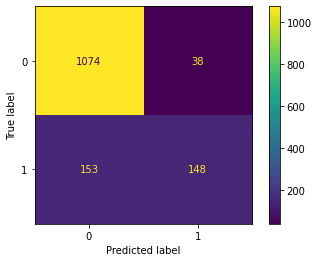

In [39]:
mc = confusion_matrix(y_test, predicao, labels=modelo.classes_)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=mc,display_labels=modelo.classes_)
visualizacao.plot()
plt.show()

## Cálculo da acurácia, precisão e recall do modelo.

In [40]:
acuracia = accuracy_score(y_test, predicao) * 100
print ("A acurácia foi de {:.2f}%.".format(acuracia))
precisao = precision_score(y_test, predicao) * 100
print ("A precisão foi de {:.2f}%.".format(precisao))
recall = recall_score(y_test, predicao) * 100
print ("O recall foi de {:.2f}%.".format(recall))

A acurácia foi de 86.48%.
A precisão foi de 79.57%.
O recall foi de 49.17%.
